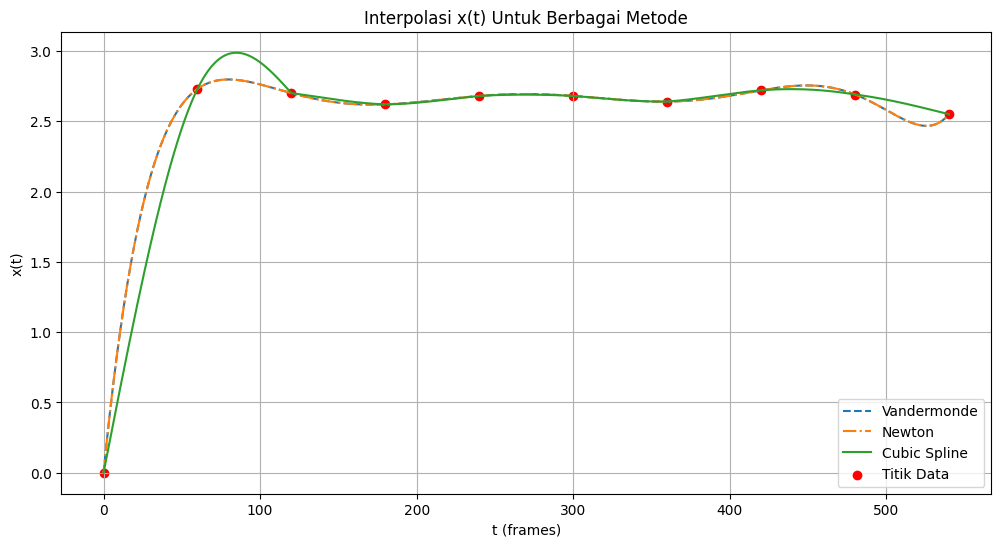

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Fungsi interpolasi berdasarkan tiga metode
t_values = np.array([0, 60, 120, 180, 240, 300, 360, 420, 480, 540])
x_values = np.array([0, 2.73, 2.70, 2.62, 2.68, 2.68, 2.64, 2.72, 2.69, 2.55])

# Fungsi interpolasi Vandermonde
vandermonde_coeffs = np.polyfit(t_values, x_values, 9)
vandermonde_poly = np.poly1d(vandermonde_coeffs)

# Fungsi interpolasi Newton
# (Dihitung dengan divided differences sebelumnya)
newton_coeffs = [
    0.0,
    4.55000000e-02,
    -3.83333333e-04,
    2.09104938e-06,
    -8.10185185e-09,
    2.28266461e-11,
    -4.52484377e-14,
    5.88286393e-17,
    -8.71207259e-20,
    5.33224782e-22,
]

def evaluate_newton_polynomial(coefficients, t_points, t_eval):
    n = len(coefficients)
    result = np.zeros_like(t_eval, dtype=float)
    for i in range(n):
        term = coefficients[i]
        for j in range(i):
            term *= (t_eval - t_points[j])
        result += term
    return result

# newton_poly = np.poly1d(newton_coeffs[::-1])
newton_poly = lambda t: evaluate_newton_polynomial(newton_coeffs, t_values, t)

# Fungsi interpolasi Cubic Spline
def cubic_spline(t, x):
    n = len(t) - 1
    h = np.diff(t)
    b = np.diff(x) / h

    u = np.zeros(n + 1)
    v = np.zeros(n + 1)

    for i in range(1, n):
        u[i] = 2 * (h[i - 1] + h[i])
        v[i] = 6 * (b[i] - b[i - 1])

    u[0], u[-1] = 1, 1
    v[0], v[-1] = 0, 0

    z = np.zeros(n + 1)
    for i in range(1, n):
        z[i] = v[i] / u[i]

    a = x[:-1]
    b = np.diff(x) / h - h * (2 * z[:-1] + z[1:]) / 6
    c = z[:-1] / 2
    d = np.diff(z) / (6 * h)

    def spline_func(t_query):
        results = []
        for tq in t_query:
            for i in range(n):
                if t[i] <= tq <= t[i + 1]:
                    dx = tq - t[i]
                    result = a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3
                    results.append(result)
                    break
        return np.array(results)

    return spline_func

cubic_spline_func = cubic_spline(t_values, x_values)

# Interval evaluasi
t_eval = np.linspace(0, 540, 1000)
vandermonde_eval = vandermonde_poly(t_eval)
newton_eval = newton_poly(t_eval)
cubic_spline_eval = cubic_spline_func(t_eval)

# Filter untuk menampilkan x hanya pada rentang [-1, 4]
mask = (vandermonde_eval >= -1) & (vandermonde_eval <= 4)

# Plot hasil interpolasi
plt.figure(figsize=(12, 6))
# plt.ylim(-1, 4)
plt.plot(t_eval[mask], vandermonde_eval[mask], label="Vandermonde", linestyle="--")
plt.plot(t_eval[mask], newton_eval[mask], label="Newton", linestyle="-.")
plt.plot(t_eval[mask], cubic_spline_eval[mask], label="Cubic Spline", linestyle="-")
plt.scatter(t_values, x_values, color="red", label="Titik Data")
plt.xlabel("t (frames)")
plt.ylabel("x(t)")
plt.title("Interpolasi x(t) Untuk Berbagai Metode")
plt.legend()
plt.grid()
plt.show()
